# Pierwszy projekt z Machine Learningu
#### Piotr Kędziora

Używam danych o cenach domów ze strony: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
Zadania wykonuję według poleceń https://github.com/piotrMocz/mownit2/blob/master/Lab6.ipynb

Strony, które mi najbardziej pomogły:
* https://www.kaggle.com/apapiu/regularized-linear-models
* https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Ponieważ jest to mój pierwszy projekt Machine Learning wszysttko będzie bardzo po-kolei ;)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

By nie komplikować zbytnio mojego pierwszego projektu z ML, zredukuję liczbę danych do kilku potrzebnych mi kolumn, poprzez wczytanie kolumn z *Id, powierzchnią działki, rokiem budowy* i *powierzchnią parteru* oraz odpowiadającą im **cenę**

In [2]:
fields = ['Id', 'LotArea', 'YearBuilt', '1stFlrSF', 'SalePrice']
train = pd.read_csv("C:/Users/ImI/train.csv", skipinitialspace=True, usecols=fields)

In [3]:
train.keys()

Index(['Id', 'LotArea', 'YearBuilt', '1stFlrSF', 'SalePrice'], dtype='object')

In [4]:
train.head()

,Id,LotArea,YearBuilt,1stFlrSF,SalePrice
0,1,8450,2003,856,208500
1,2,9600,1976,1262,181500
2,3,11250,2001,920,223500
3,4,9550,1915,961,140000
4,5,14260,2000,1145,250000


regresję będę wykonywał na początku po wartościach powierzchni parteru, więc posrtuję DataFrame

In [5]:
train=train.sort_values(['1stFlrSF'])

chcę zobaczyć czy dobrze domyślam się, że cena zależy od wielkości działki

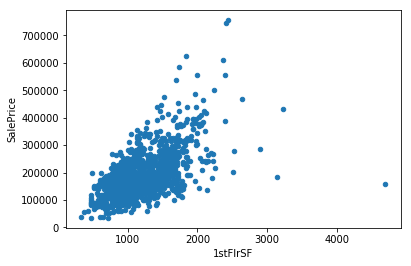

In [6]:
train.plot(x='1stFlrSF', y='SalePrice', kind='scatter')

tak, można wskazać taką tendencję, jednak jak się okazało, jest trochę danych, o canach znacznie wykraczających ponad normę, więc postaram się ich pozbyć, usuwając te których odchylenie jest trzy razy większe niż odchylenie standardowe

In [7]:
from scipy import stats
train=train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]

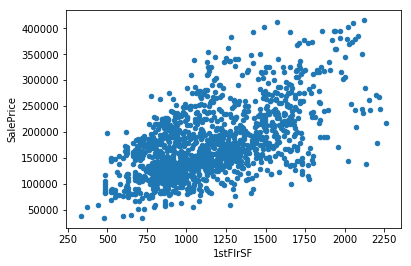

In [8]:
train.plot(x='1stFlrSF', y='SalePrice', kind='scatter')

teraz rysuję **histogram**, czyli przedstawienie rozkładu danych - ile mieszkań o jakiej cenie  mam w mojej tabeli

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDE92F32E8>]],
      dtype=object)

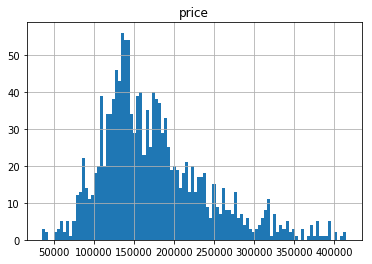

In [9]:
prices = pd.DataFrame({"price":train["SalePrice"]})
prices.hist(bins=100)

ponieważ dane są najbardziej użyteczne, gdy ich rozkład jest podobny do rozkładu Gaussa, próbuję zlogarytmować histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDE93EFB00>]],
      dtype=object)

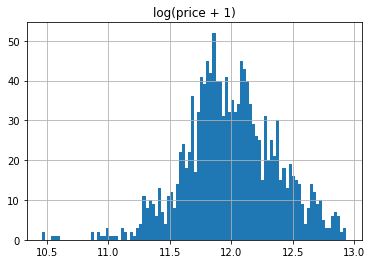

In [10]:
log_prices = pd.DataFrame({"log(price + 1)":np.log1p(train["SalePrice"])})
log_prices.hist(bins=100)

zlogarytmizowanie w mojej opinii jest niewiele bardziej zbliżone do rozkładu Gaussa niż normalnie, więc pozostawię je oryginalnie

teraz sprawdzę czy mam jakieś wartości puste w mojej tabeli

In [11]:
train.isnull().values.any()

False

skoro dane mam już mniej więcej przygotowane, spróbuję stworzyć prostą **regresję wielomianową** (dającą się, jak wiadomo, sprowadzić do *regresji liniowej* - https://pl.wikipedia.org/wiki/Regresja_(statystyka) ), pokazującą zależność ceny od powierzchni parteru, co wykonam bardzo podobnie do sposobu pokazanego tu: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

podzielę powierzchnię dla potrzeb regresji tak, by kolejne potęgi nie stwarzały zbyt dużych problemów w reprezentacji

In [12]:
train['1stFlrSF'] = train['1stFlrSF'].apply(lambda x: x/100)

In [13]:
for i in range(2,16):  #power of 1 is already there
    colname = '1stFlrSF%d'%i      #new var will be x_power
    train[colname] = (train['1stFlrSF'])**i
train.head()

,Id,LotArea,YearBuilt,1stFlrSF,SalePrice,1stFlrSF2,1stFlrSF3,1stFlrSF4,1stFlrSF5,1stFlrSF6,1stFlrSF7,1stFlrSF8,1stFlrSF9,1stFlrSF10,1stFlrSF11,1stFlrSF12,1stFlrSF13,1stFlrSF14,1stFlrSF15
533,534,5000,1946,3.34,39300,11.1556,37.259704,124.447411,415.654354,1388.285542,4636.873711,15487.158194,5.172711e+04,1.727685e+05,5.770469e+05,1.927337e+06,6.437305e+06,2.150060e+07,7.181200e+07
705,706,5600,1930,3.72,55000,13.8384,51.478848,191.501315,712.384890,2650.071791,9858.267064,36672.753478,1.364226e+05,5.074922e+05,1.887871e+06,7.022880e+06,2.612512e+07,9.718543e+07,3.615298e+08
1100,1101,8400,1920,4.38,60000,19.1844,84.027672,368.041203,1612.020471,7060.649662,30925.645518,135454.327371,5.932900e+05,2.598610e+06,1.138191e+07,4.985277e+07,2.183551e+08,9.563956e+08,4.189013e+09
916,917,9000,1949,4.80,35311,23.0400,110.592000,530.841600,2548.039680,12230.590464,58706.834227,281792.804291,1.352605e+06,6.492506e+06,3.116403e+07,1.495873e+08,7.180192e+08,3.446492e+09,1.654316e+10
430,431,1680,1971,4.83,85400,23.3289,112.678587,544.237575,2628.667488,12696.463968,61323.920967,296194.538270,1.430620e+06,6.909893e+06,3.337478e+07,1.612002e+08,7.785970e+08,3.760623e+09,1.816381e+10


In [14]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['1stFlrSF']
    if power>=2:
        predictors.extend(['1stFlrSF%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['SalePrice'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['1stFlrSF'],y_pred)
        plt.plot(data['1stFlrSF'],data['SalePrice'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['SalePrice'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

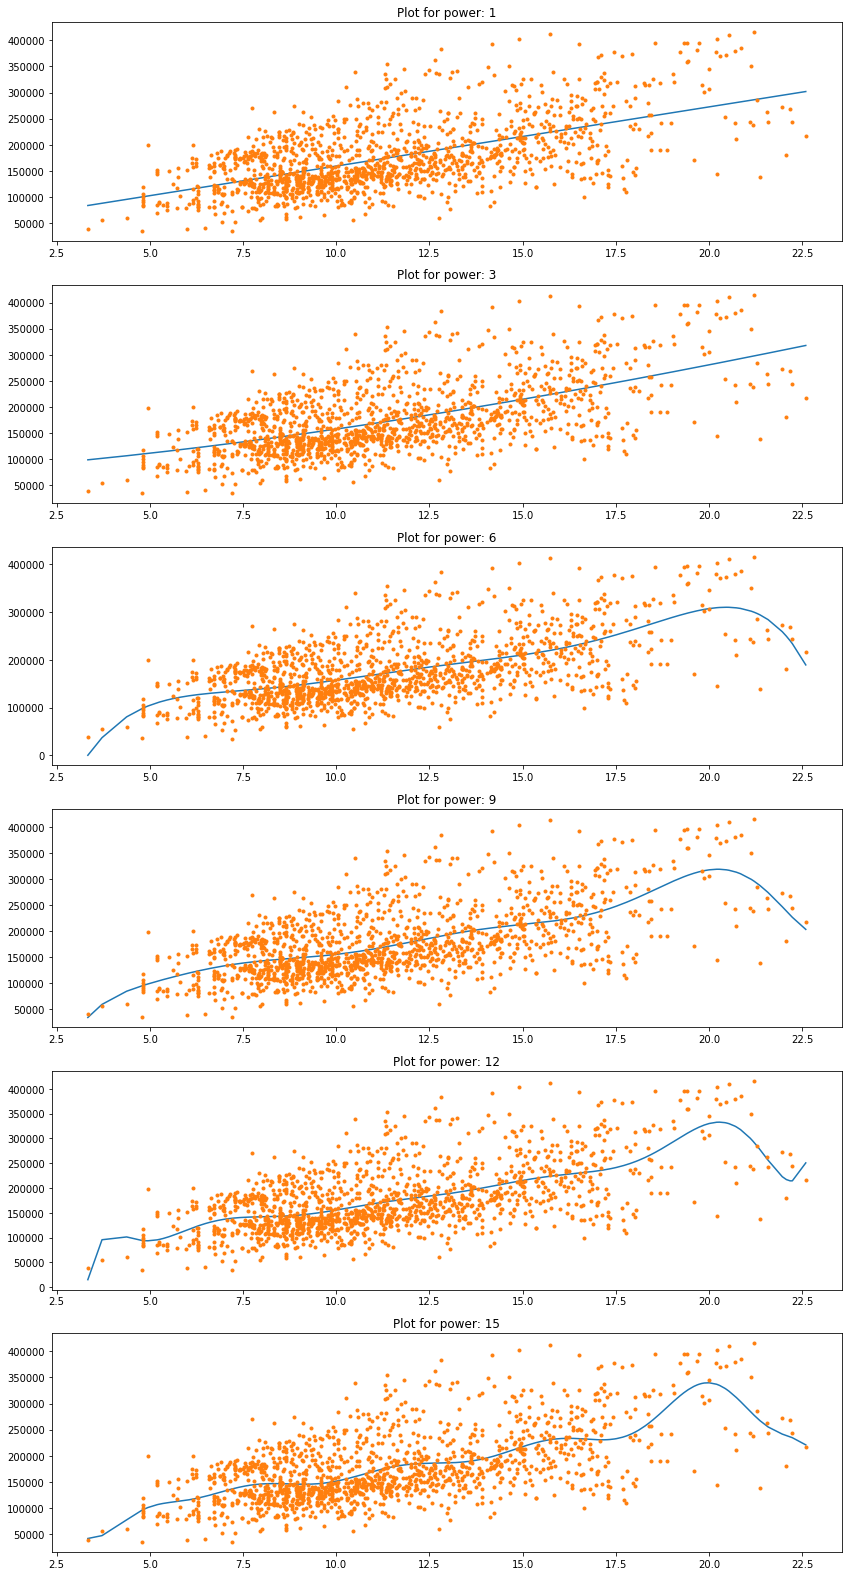

In [15]:
matplotlib.rcParams['figure.figsize'] = (12.0, 22.0)
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:611,3:612,6:613,9:614,12:615,15:616}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(train, power=i, models_to_plot=models_to_plot)

jak widać, wraz ze wzrostem dokładności, krzywa lepiej dopasowuje się do naszych danych
#### sprawdzę jak wyglądają współczynniki dla kolejnych stopni:

In [16]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,4.1e+12,4.6e+04,1.1e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,4.1e+12,7.3e+04,6.5e+03,1.9e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,4.1e+12,7.8e+04,5.3e+03,2.9e+02,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,4e+12,-1.9e+05,1e+05,-1.3e+04,7e+02,-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,4e+12,8.9e+04,-3.1e+04,1.2e+04,-1.4e+03,73,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,4e+12,-1.2e+06,7.3e+05,-1.7e+05,2e+04,-1.3e+03,42,-0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,4e+12,6.7e+04,-1.7e+05,9.7e+04,-2.1e+04,2.3e+03,-1.4e+02,4.3,-0.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,4e+12,1.7e+06,-1.5e+06,5.8e+05,-1.1e+05,1.3e+04,-8.7e+02,35,-0.76,0.0068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,4e+12,-3e+06,3.1e+06,-1.3e+06,3.2e+05,-4.7e+04,4.5e+03,-2.7e+02,10,-0.21,0.0019,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,4e+12,9.3e+06,-1e+07,5e+06,-1.3e+06,2.3e+05,-2.5e+04,1.9e+03,-95,3,-0.055,0.00044,NaN,NaN,NaN,NaN,NaN


jak widać, wartość bezwzględna współczynników rośnie bardzo szybko przy kolejnych stopniach wielomianu
#### zasosuję więc regresję grzbietową, by zminimalizować współczynniki
błąd do minimalizacji to teraz suma kwadratów błędów + α * (suma kwadratów współczynników)

In [17]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['SalePrice'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['1stFlrSF'],y_pred)
        plt.plot(data['1stFlrSF'],data['SalePrice'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['SalePrice'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\Users\ImI\.julia\conda\3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.30016e-17): result may not be accurate.
  overwrite_a=True).T


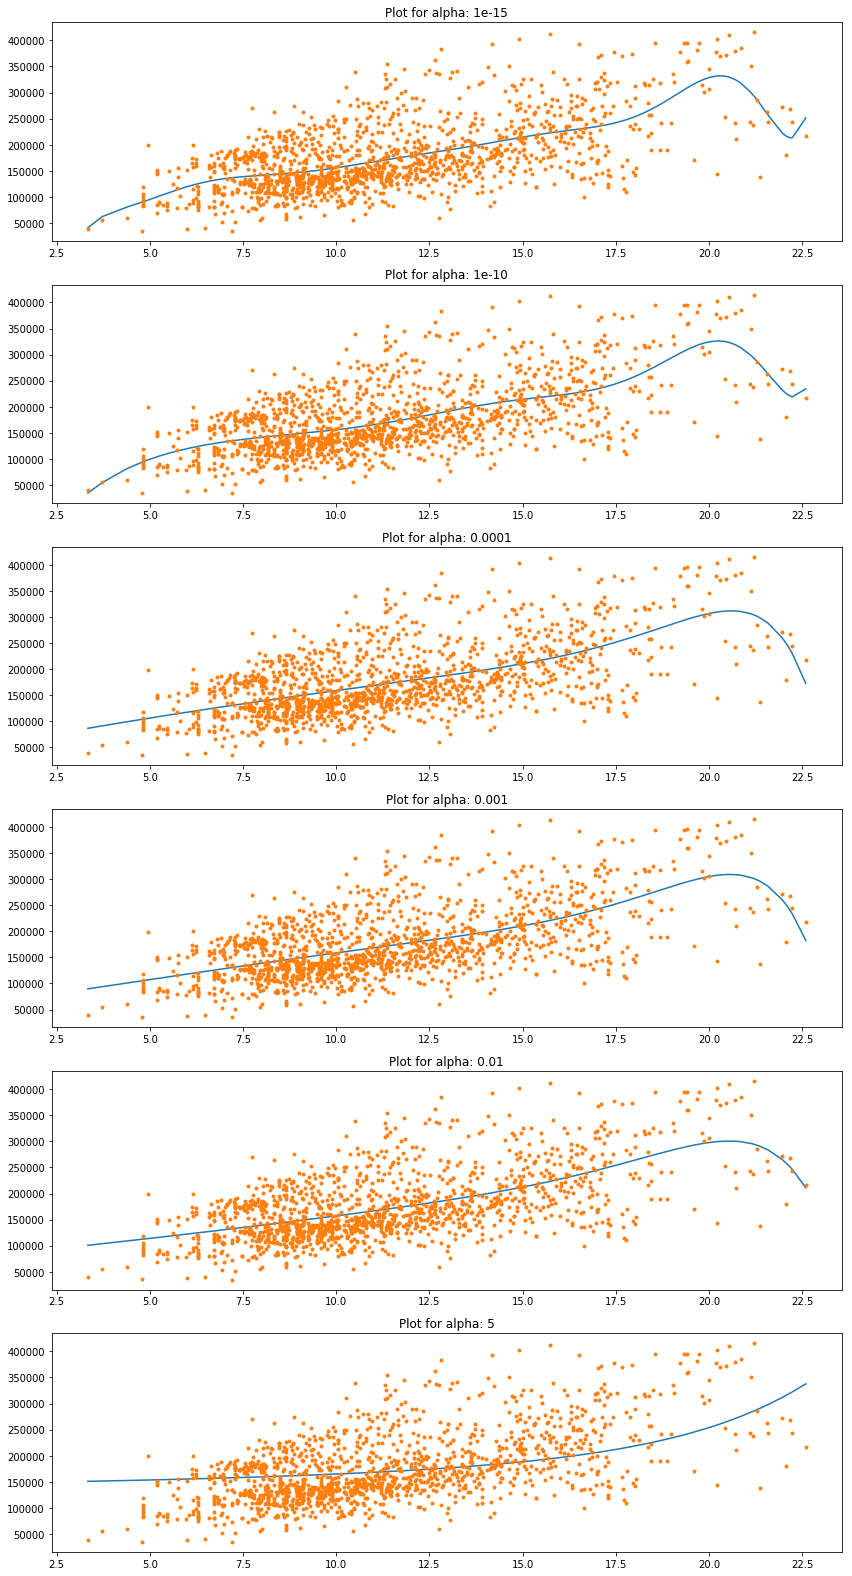

In [18]:
matplotlib.rcParams['figure.figsize'] = (12.0, 22.0)
#Initialize predictors to be set of 15 powers of x
predictors=['1stFlrSF']
predictors.extend(['1stFlrSF%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:611, 1e-10:612, 1e-4:613, 1e-3:614, 1e-2:615, 5:616}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train, predictors, alpha_ridge[i], models_to_plot)

i sprawdźmy jak zachowują się **współczynniki**

In [19]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,3.9e+12,-8.8e+06,1e+07,-5.2e+06,1.4e+06,-2.4e+05,2.3e+04,-1.2e+03,3.2,2.7,-0.072,-0.005,0.00025,6e-06,-6.8e-07,1.8e-08,-1.7e-10
alpha_1e-10,4e+12,-4.3e+05,2.6e+05,-5.2e+04,5.1e+03,-1.4e+02,-15,0.68,0.052,-0.00099,-0.00018,-3.6e-06,3.7e-07,2.4e-08,-2e-10,-8.3e-11,2.1e-12
alpha_1e-08,4e+12,-1.7e+05,6.6e+04,2.6e+03,-1.3e+03,50,4,-0.025,-0.012,-0.00049,3.6e-06,1.4e-06,7.4e-08,5.4e-10,-1.7e-10,-1e-11,4.2e-13
alpha_0.0001,4e+12,4.3e+04,1.4e+04,-3e+02,1.6,0.4,0.0033,-0.00078,-4.3e-05,-3.3e-07,1e-07,8.8e-09,4.5e-10,1.4e-11,3e-14,-3.6e-14,-3.3e-15
alpha_0.001,4e+12,5.4e+04,1.1e+04,42,-3.2,-0.2,-0.0068,-2.2e-05,1.8e-05,1.7e-06,1.1e-07,5.1e-09,1.9e-10,3.7e-12,-1.6e-13,-2.5e-14,-2.1e-15
alpha_0.01,4e+12,7.6e+04,7.2e+03,92,0.19,-0.043,-0.00037,0.00016,1.6e-05,1e-06,5.2e-08,2.1e-09,6e-11,1.8e-13,-1.4e-13,-1.5e-14,-1.1e-15
alpha_1,4.2e+12,1.2e+05,2.4e+03,82,3.3,0.14,0.0055,0.00021,7.1e-06,2.2e-07,5.2e-09,3.1e-11,-7.5e-12,-7.1e-13,-4.8e-14,-2.8e-15,-1.6e-16
alpha_5,4.7e+12,1.5e+05,1.1e+03,41,1.8,0.078,0.0033,0.00014,5.5e-06,2.1e-07,7.9e-09,2.8e-10,9.3e-12,2.8e-13,6.8e-15,6e-17,-7.5e-18
alpha_10,5e+12,1.6e+05,7.1e+02,27,1.2,0.054,0.0024,0.0001,4.3e-06,1.8e-07,7.1e-09,2.8e-10,1.1e-11,4.2e-13,1.6e-14,5.7e-16,2e-17
alpha_20,5.3e+12,1.6e+05,4.2e+02,16,0.74,0.034,0.0016,6.9e-05,3e-06,1.3e-07,5.4e-09,2.2e-10,9.2e-12,3.8e-13,1.5e-14,6.3e-16,2.5e-17


współczynniki wyglądają teraz znacznie lepiej - są mniejsze, ale żadne się nie zerują:

In [20]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

#### możemy wymusić zerowanie za pomocą regresji Lasso
błąd = suma kwadratów błędów + α * (suma bezwględnych wartości współczynników)

In [21]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['SalePrice'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['1stFlrSF'],y_pred)
        plt.plot(data['1stFlrSF'],data['SalePrice'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['SalePrice'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\ImI\.julia\conda\3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


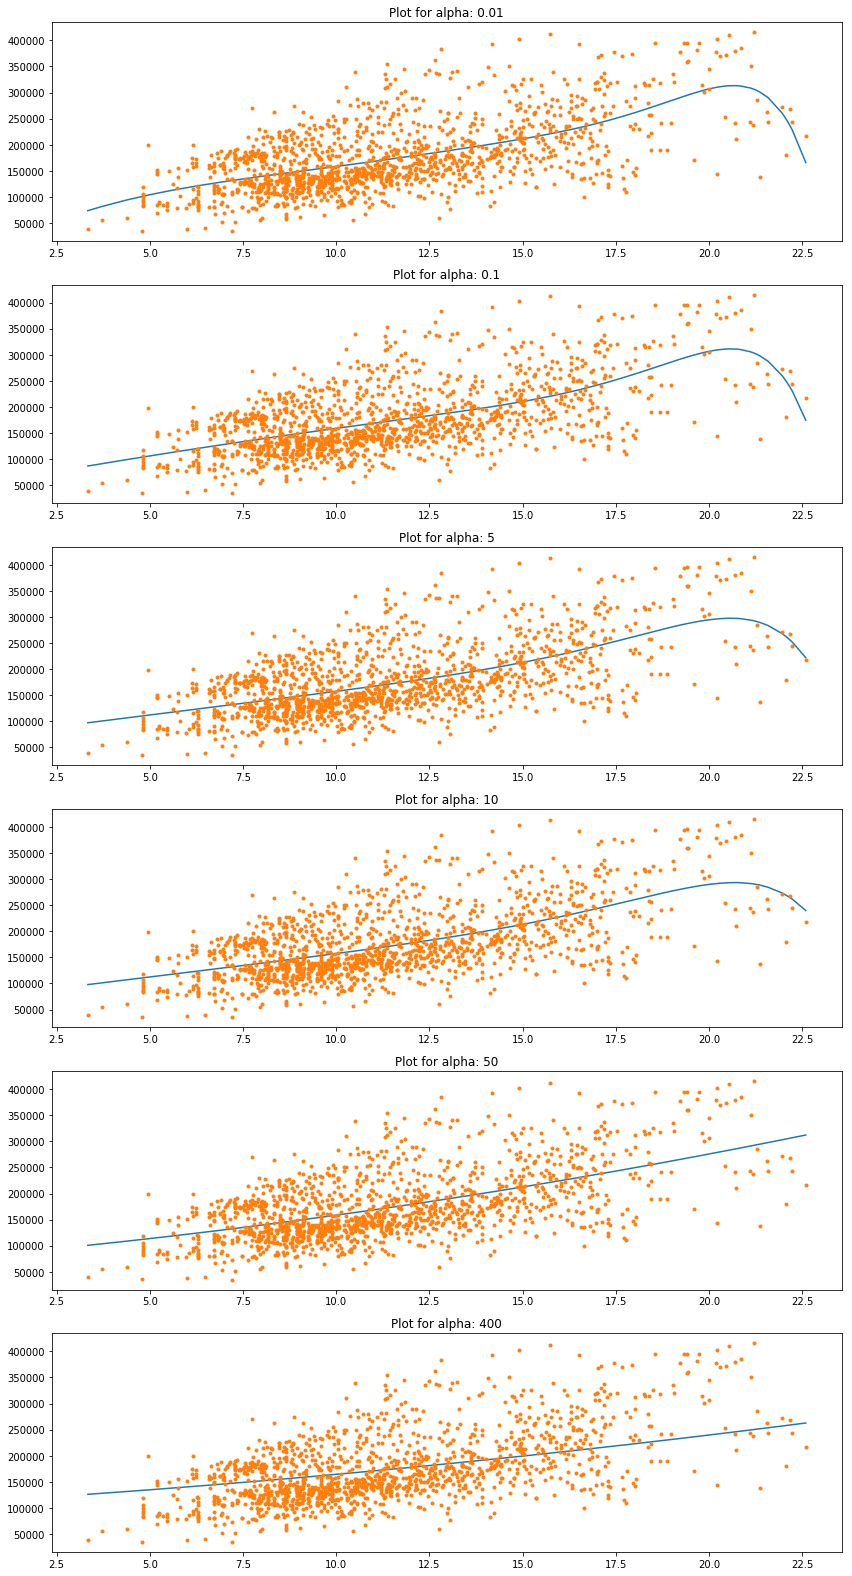

In [22]:
matplotlib.rcParams['figure.figsize'] = (12.0, 22.0)
#Initialize predictors to all 15 powers of x
predictors=['1stFlrSF']
predictors.extend(['1stFlrSF%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [0.01, 0.1, 3, 5, 10, 20,50, 100,200, 400]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {0.01:611, 0.1:612,5:613, 10:614, 50:615, 400:616}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train, predictors, alpha_lasso[i], models_to_plot)

sprawdźmy współczynniki

In [23]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_0.01,4e+12,-3.6e+04,4.5e+04,-4.3e+03,1.6e+02,3.6,-0.082,-0.011,-0.0002,0,7e-07,3.3e-08,6.1e-10,-0,-5.1e-13,-1.1e-13,-1.5e-15
alpha_0.1,4e+12,4.5e+04,1.3e+04,-1.6e+02,-0,-0,-0,-0.00018,-0,-0,0,1.4e-08,3e-10,0,0,-0,-3.7e-15
alpha_3,4e+12,6.6e+04,9.1e+03,0,-0,0,0,0,0,3.8e-06,1e-08,0,0,0,-0,-0,-1.7e-15
alpha_5,4e+12,6.7e+04,8.9e+03,0,0,0,0,0,6.6e-05,2.3e-07,0,0,0,0,-0,-0,-1.3e-15
alpha_10,4e+12,6.9e+04,8.7e+03,0,0,0,0.0022,0.0011,0,0,0,0,0,-0,-0,-0,-8.9e-16
alpha_20,4e+12,7.3e+04,8e+03,0,0,0.41,0,0,0,0,0,0,-0,-0,-0,-0,-4.6e-16
alpha_50,4.1e+12,7.8e+04,6.2e+03,1.8e+02,0,0,0,0,0,0,0,-0,-0,-0,-0,-0,-0
alpha_1e+02,4.1e+12,8.2e+04,6e+03,1.7e+02,0,0,0,0,0,0,0,0,0,0,-0,-0,-0
alpha_2e+02,4.1e+12,9.2e+04,5.4e+03,1.5e+02,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_4e+02,4.4e+12,1.1e+05,4.3e+03,1.1e+02,0,0,0,0,0,0,0,0,0,0,0,0,0


i zobaczmy ile z nich się **zeruje**:

In [24]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_0.01      2
alpha_0.1       9
alpha_3        11
alpha_5        11
alpha_10       11
alpha_20       12
alpha_50       13
alpha_1e+02    13
alpha_2e+02    13
alpha_4e+02    13
dtype: int64

__________
teraz spróbuję użyć regresji przy **wielu zmiennych**
próbowałem zastosować coś z tego linku, ale niestety pogubiłem się: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

znalazłem natomiast taki przykład tłumaczący regresję, na podstawie którego stworzyłem model poniżej:

In [25]:
fields = ['Id', 'LotArea', 'YearBuilt','1stFlrSF', 'FullBath', 'BedroomAbvGr', 'GarageCars', 'SalePrice']
train = pd.read_csv("C:/Users/ImI/train.csv", skipinitialspace=True, usecols=fields)
train = train.sort_values(['SalePrice'])
train = train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]


#fields2 = ['Id', 'LotArea', 'YearBuilt', '1stFlrSF']
#test = pd.read_csv("C:/Users/ImI/test.csv", skipinitialspace=True, usecols=fields2)

In [26]:
train.shape

(1402, 8)

In [27]:
train.head()

,Id,LotArea,YearBuilt,1stFlrSF,FullBath,BedroomAbvGr,GarageCars,SalePrice
495,496,7879,1920,720,1,2,0,34900
916,917,9000,1949,480,0,1,1,35311
968,969,5925,1910,600,1,2,0,37900
533,534,5000,1946,334,1,1,0,39300
30,31,8500,1920,649,1,3,1,40000


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

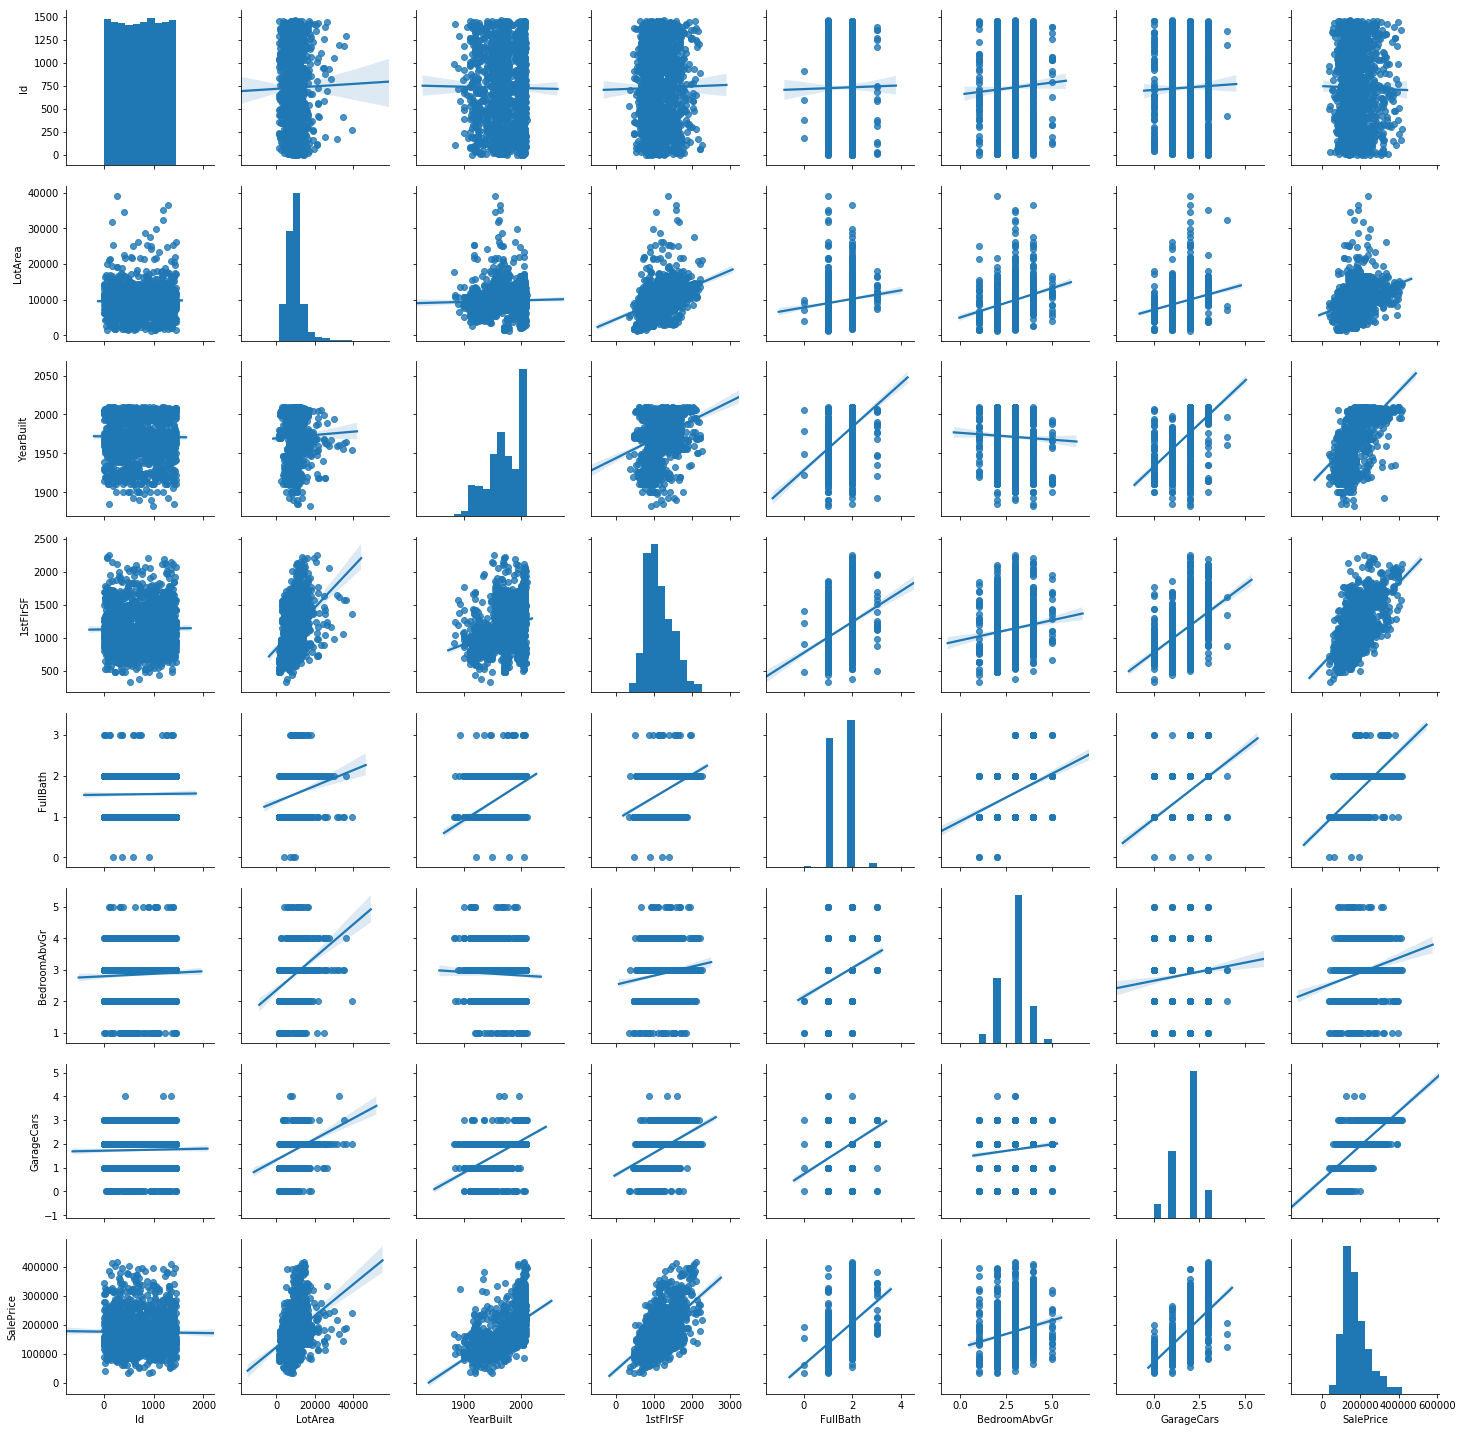

In [35]:
sns.pairplot(train, kind="reg")

In [36]:
train.corr()

,Id,LotArea,YearBuilt,1stFlrSF,FullBath,BedroomAbvGr,GarageCars,SalePrice
Id,1,0.013,-0.01,0.013,0.012,0.045,0.024,-0.015
LotArea,0.013,1,0.03,0.38,0.15,0.29,0.25,0.34
YearBuilt,-0.01,0.03,1,0.28,0.5,-0.044,0.54,0.58
1stFlrSF,0.013,0.38,0.28,1,0.36,0.13,0.44,0.6
FullBath,0.012,0.15,0.5,0.36,1,0.33,0.48,0.58
BedroomAbvGr,0.045,0.29,-0.044,0.13,0.33,1,0.11,0.21
GarageCars,0.024,0.25,0.54,0.44,0.48,0.11,1,0.66
SalePrice,-0.015,0.34,0.58,0.6,0.58,0.21,0.66,1


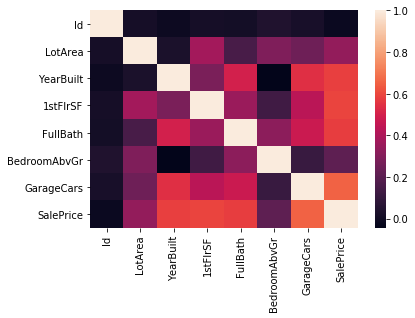

In [37]:
sns.heatmap(train.corr())

In [38]:
X = train[['Id', 'LotArea', 'YearBuilt','1stFlrSF', 'FullBath', 'BedroomAbvGr', 'GarageCars', 'SalePrice']]
y = train['SalePrice']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
predictions = lm.predict(X_test)

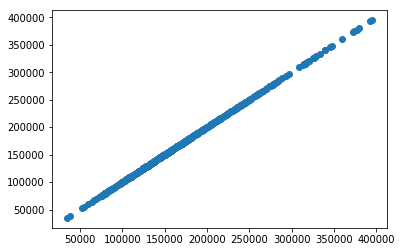

In [42]:
plt.scatter(y_test,predictions)

KeyError: "['dataset'] not in index"